# Assignment 1 : Group 6 
 ##  **TEAM MEMBERS**  
* #### Danae Marais : 578326
* #### Vuyo Fortune Mathe : 578376
* #### Roan Palm : 578632
* #### Henko Meyer : 578420

## Import Libraries

In [4]:
!pip install opendatasets 
!pip install pandas


import pandas as pnda 
import numpy as np 

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


# Import Datasets and Load data into Panda Framework

In [6]:
dataset = pnda.read_csv('./Houseprices_train.csv')

# Exploring the Data and General Information on the Dataset

## Dataset

In [7]:
dataset

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


## Check the data types in Dataset

In [8]:
dataset.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

## Check for duplicate data

In [5]:
dataset.shape #Get the initial size of dataset matrix

(1460, 81)

In [6]:
duplicaterows = dataset[dataset.duplicated()]
print("Number of duplicate rows  :", duplicaterows.shape) #Check for duplicated data rows , [0 indicates no duplicate rows]

Number of duplicate rows  : (0, 81)


## Count the number of rows

In [7]:
dataset.count()

Id               1460
MSSubClass       1460
MSZoning         1460
LotFrontage      1201
LotArea          1460
                 ... 
MoSold           1460
YrSold           1460
SaleType         1460
SaleCondition    1460
SalePrice        1460
Length: 81, dtype: int64

# Detect Outliers

In [9]:
import seaborn as cbrn  #Import Library to detect outliers
import matplotlib.pyplot as plt

## Column Outliers

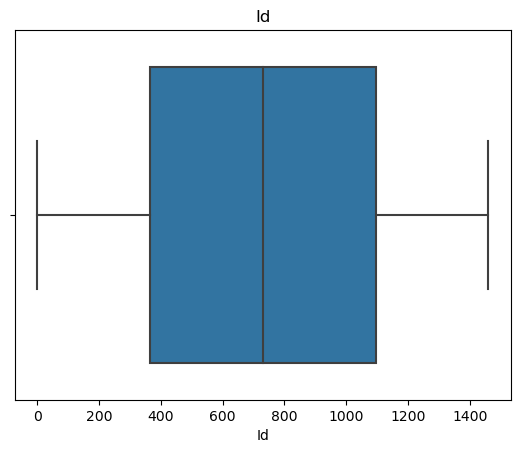

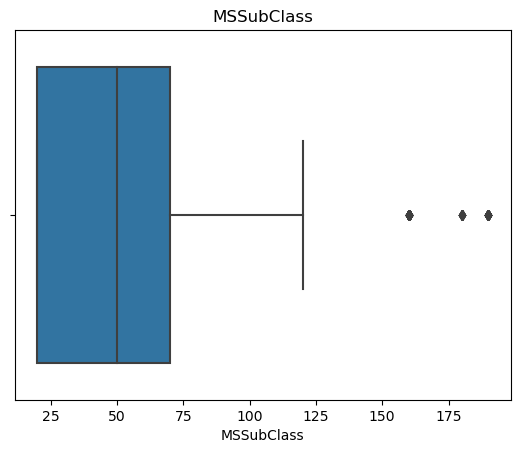

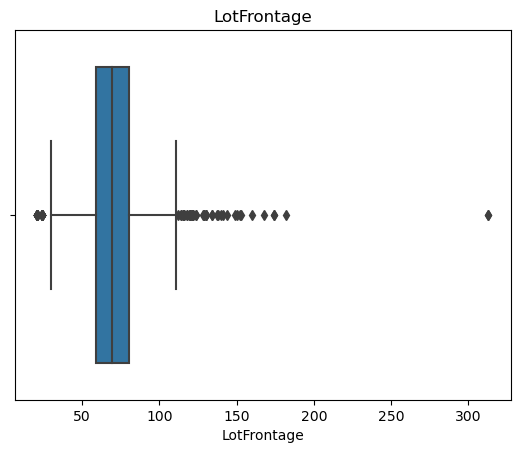

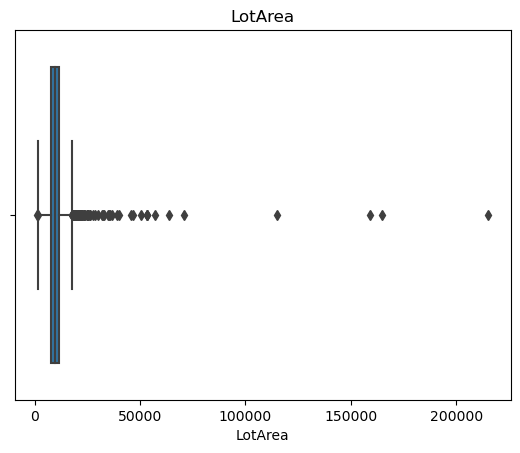

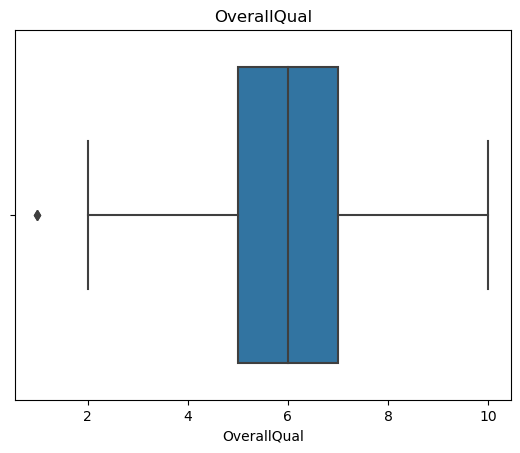

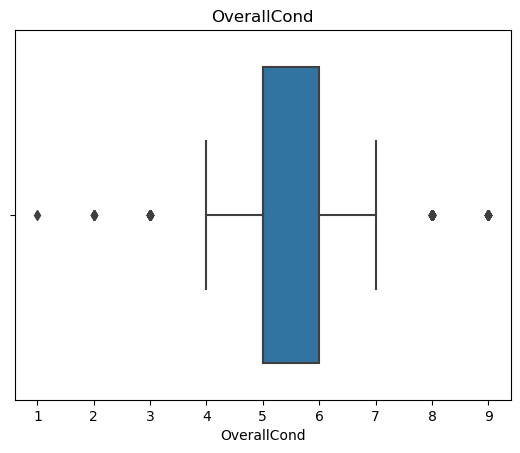

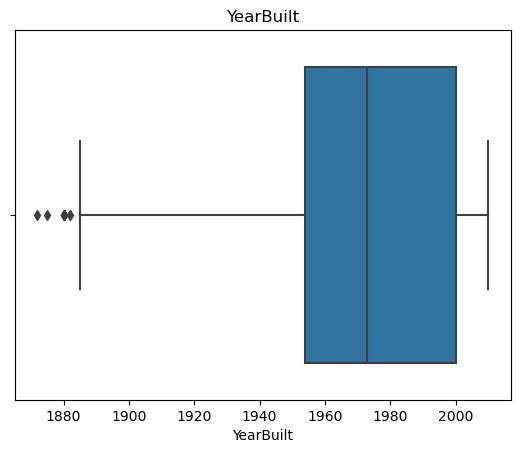

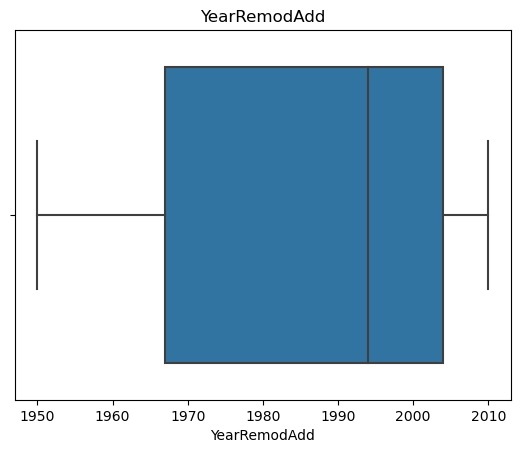

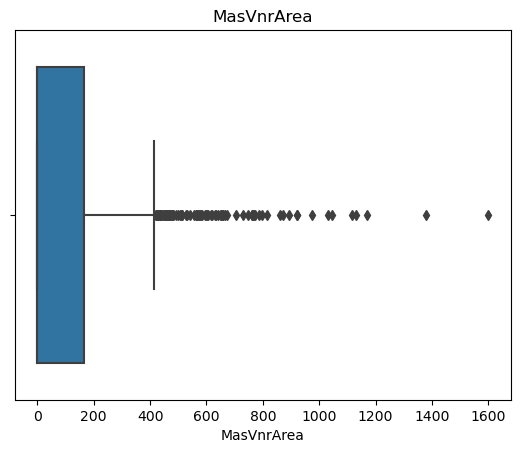

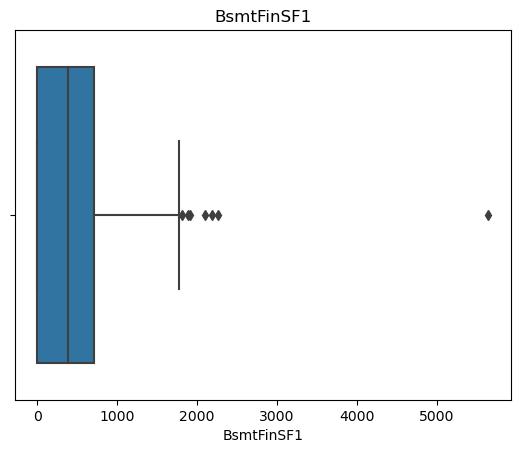

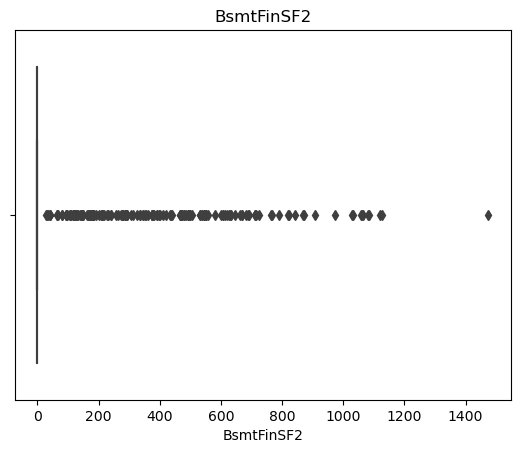

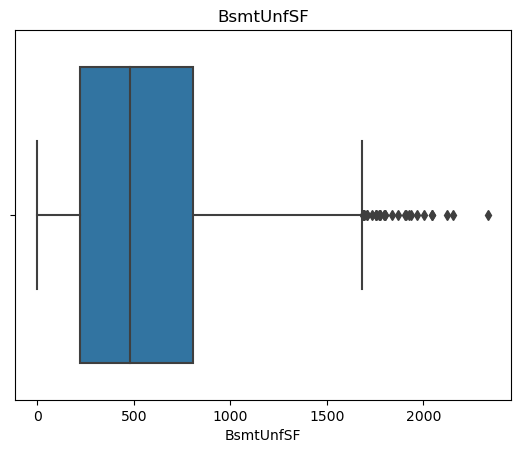

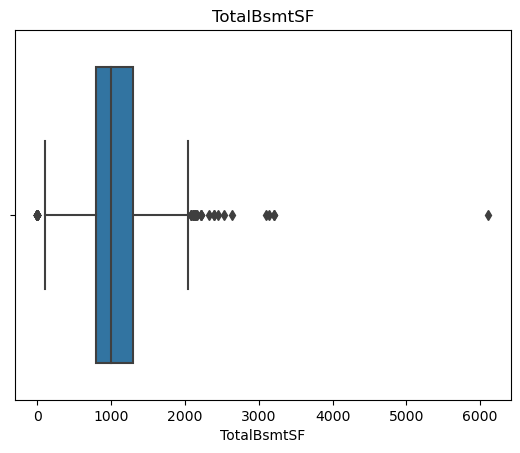

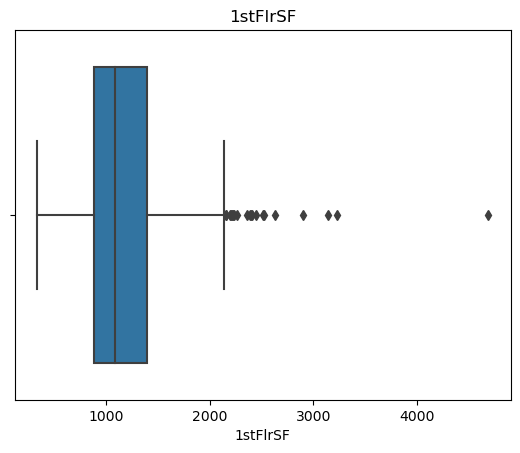

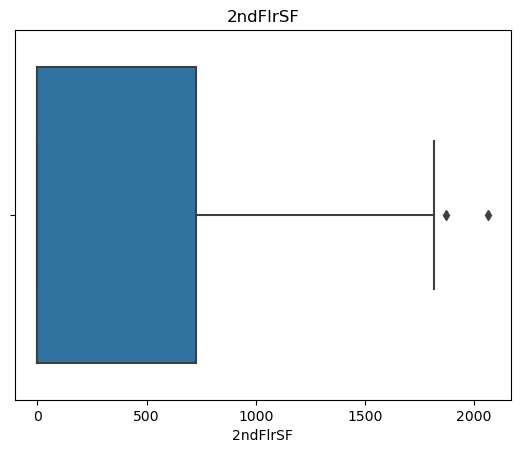

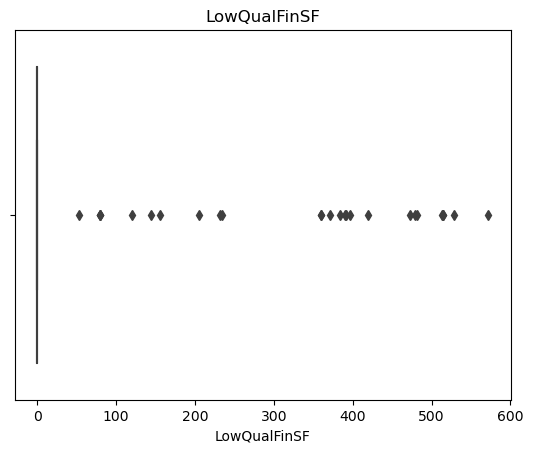

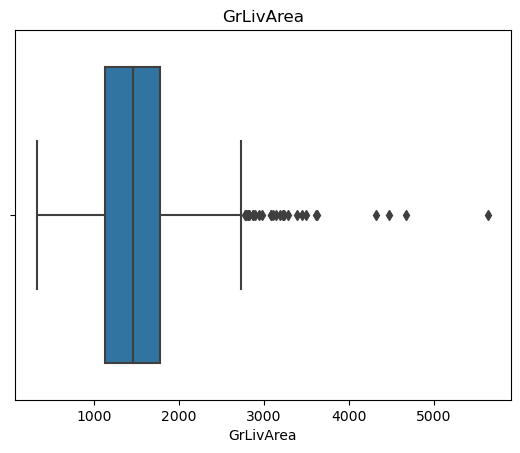

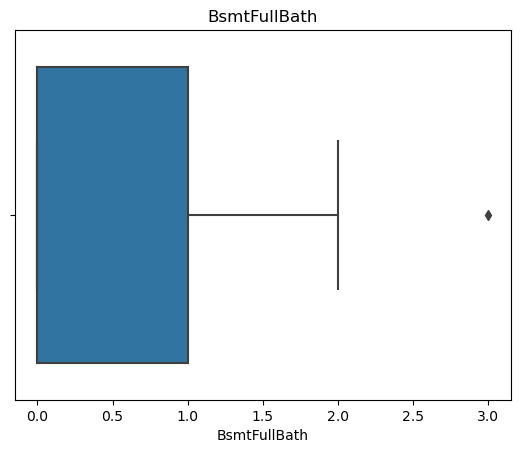

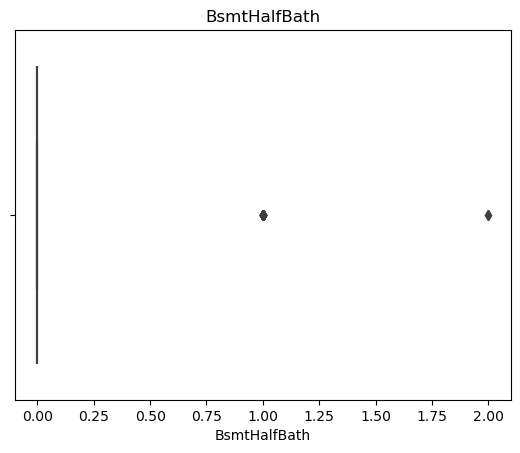

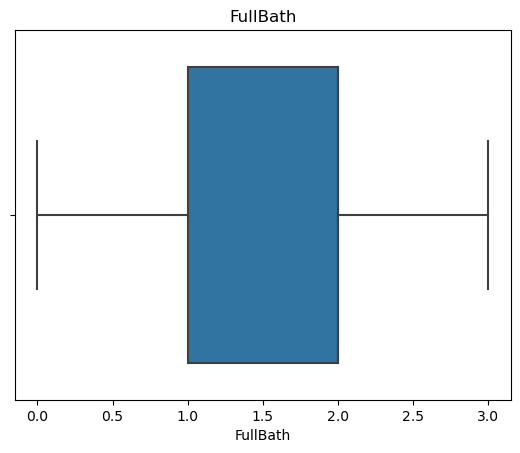

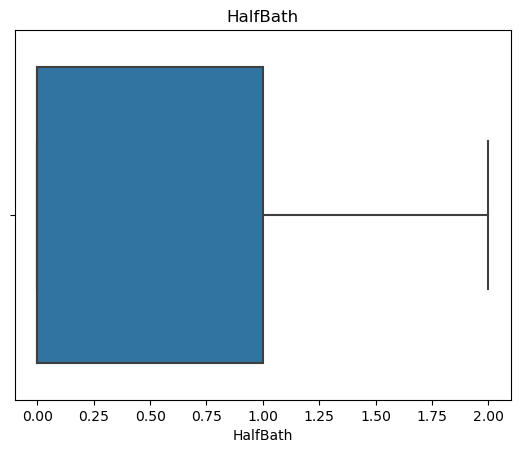

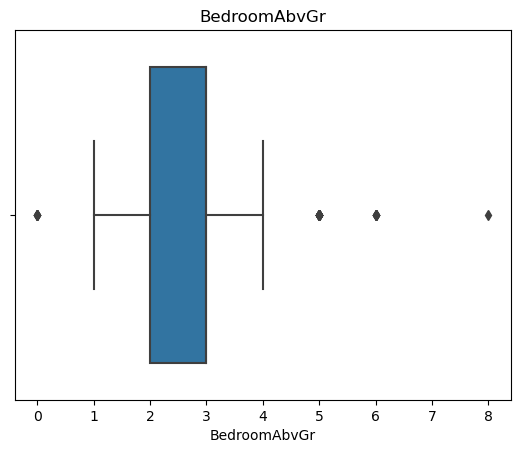

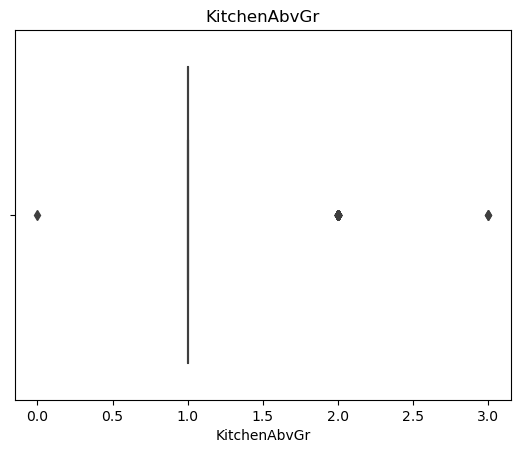

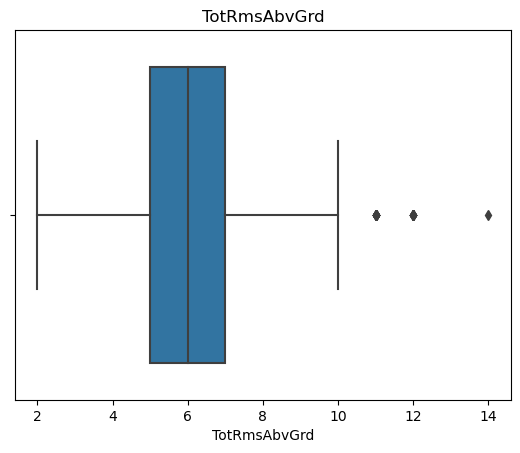

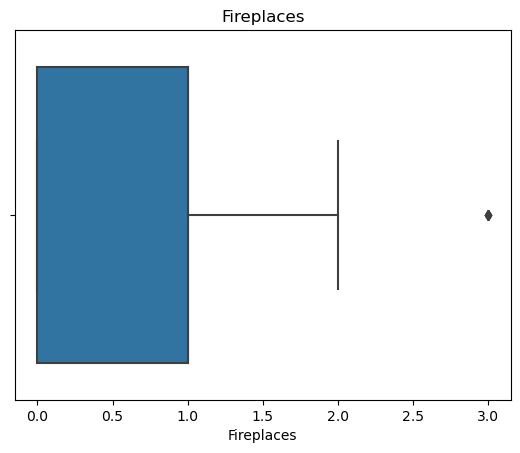

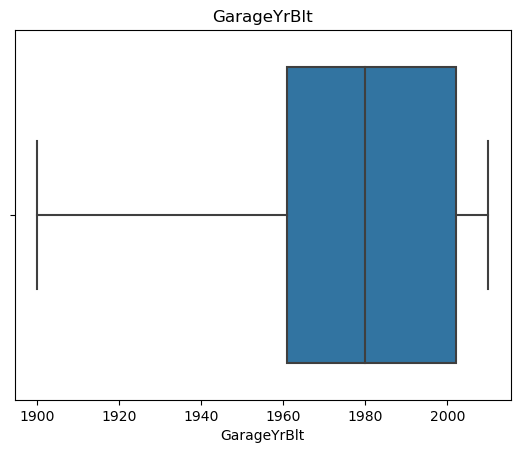

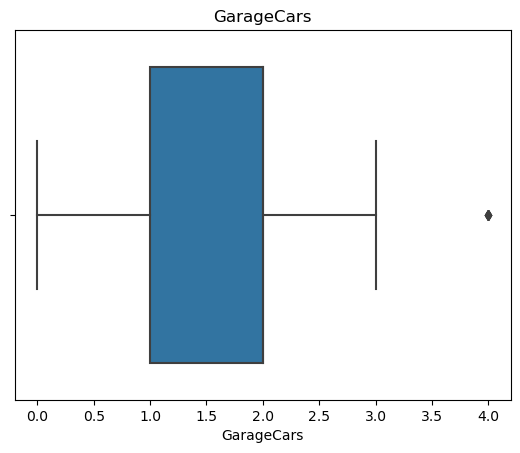

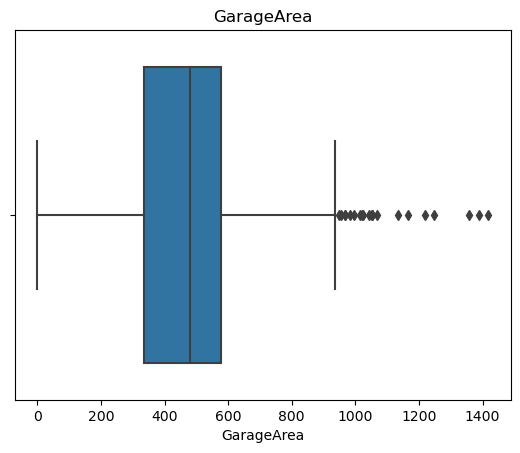

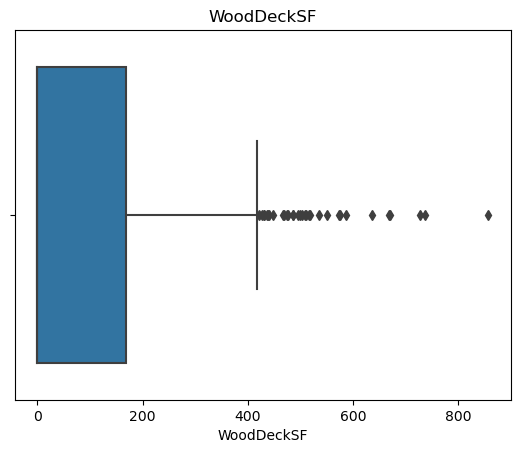

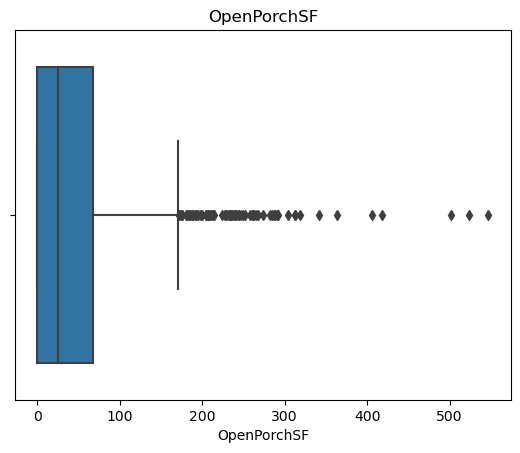

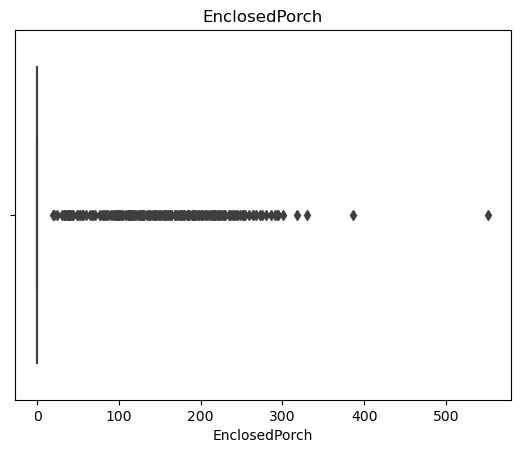

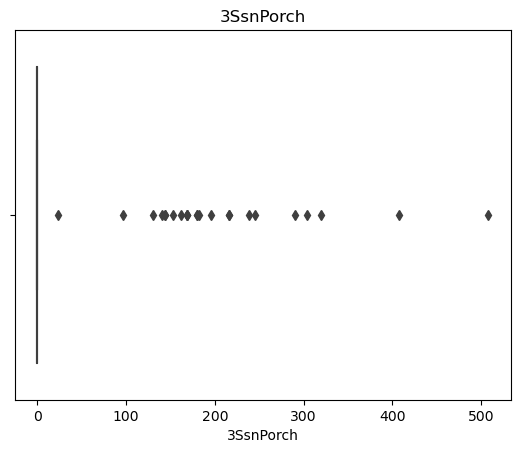

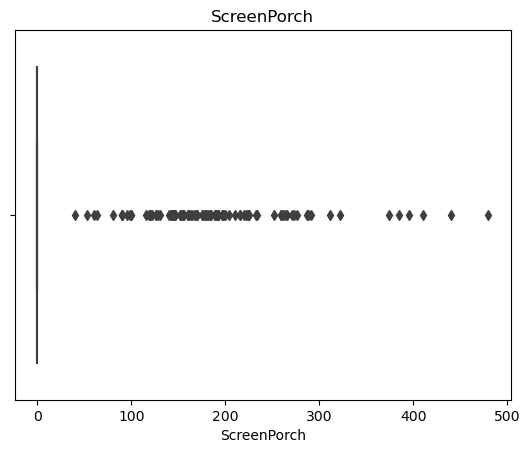

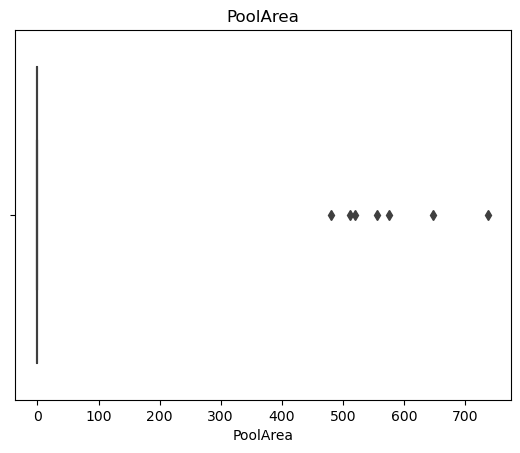

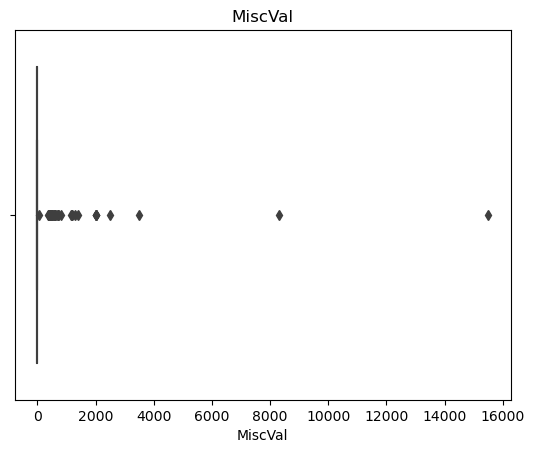

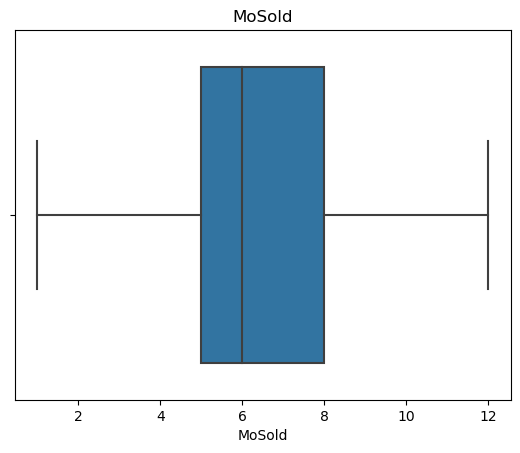

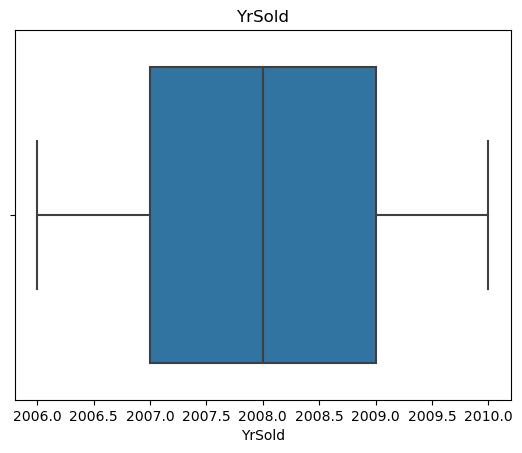

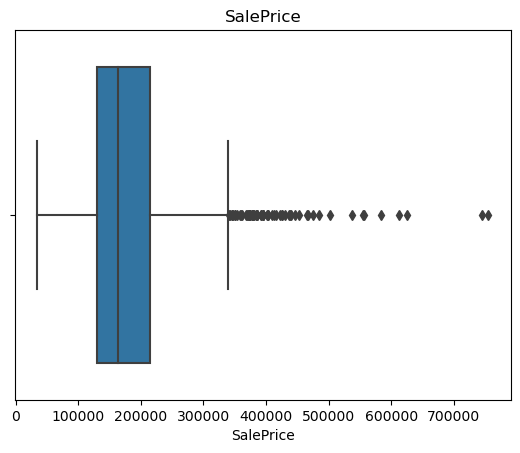

In [11]:
# Plot box plots for all numeric columns
numeric_columns = dataset.select_dtypes(include=[np.number]).columns

for column in numeric_columns:
    plt.figure()
    cbrn.boxplot(x=dataset[column])
    plt.title(column)
    plt.show()

In [12]:
outliers = {}
for column in numeric_columns:
    Q1 = dataset[column].quantile(0.25)
    Q3 = dataset[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier_mask = (dataset[column] < lower_bound) | (dataset[column] > upper_bound)
    outlier_count = outlier_mask.sum()
    outliers[column] = {'lower_bound': lower_bound,
                        'upper_bound': upper_bound,
                        'outlier_count': outlier_count,
                        'outlier_indices': dataset[outlier_mask].index.tolist()}

# Print the results
for column, outlier_info in outliers.items():
    print(f"{column}: {outlier_info['outlier_count']} outliers found")
    print(f"  Lower Bound: {outlier_info['lower_bound']}, Upper Bound: {outlier_info['upper_bound']}")
    print(f"  Indices: {outlier_info['outlier_indices']}\n")

Id: 0 outliers found
  Lower Bound: -728.5, Upper Bound: 2189.5
  Indices: []

MSSubClass: 103 outliers found
  Lower Bound: -55.0, Upper Bound: 145.0
  Indices: [9, 48, 56, 75, 87, 93, 115, 125, 145, 165, 172, 180, 193, 195, 225, 227, 232, 235, 243, 246, 285, 291, 300, 312, 335, 344, 348, 363, 411, 430, 432, 434, 472, 488, 489, 490, 500, 504, 520, 535, 578, 599, 603, 614, 623, 635, 637, 649, 655, 675, 685, 687, 703, 705, 713, 755, 758, 829, 831, 837, 861, 914, 915, 956, 959, 962, 969, 971, 975, 985, 1007, 1029, 1030, 1038, 1039, 1062, 1068, 1086, 1088, 1091, 1104, 1144, 1160, 1172, 1186, 1190, 1191, 1219, 1236, 1265, 1266, 1291, 1297, 1304, 1334, 1358, 1364, 1367, 1378, 1393, 1416, 1449, 1452]

LotFrontage: 88 outliers found
  Lower Bound: 27.5, Upper Bound: 111.5
  Indices: [36, 41, 56, 75, 85, 86, 145, 150, 159, 171, 193, 195, 197, 225, 227, 231, 232, 235, 260, 276, 277, 290, 302, 306, 313, 363, 429, 430, 432, 434, 446, 489, 500, 504, 523, 599, 614, 649, 655, 662, 675, 758, 807, 825

In [12]:
Q1 = dataset.quantile(0.25,0,True)
Q3 = dataset.quantile(0.75,0,True)
IQR = Q3 - Q1 
print(IQR)

Id                 729.50
MSSubClass          50.00
LotFrontage         21.00
LotArea           4048.00
OverallQual          2.00
OverallCond          1.00
YearBuilt           46.00
YearRemodAdd        37.00
MasVnrArea         166.00
BsmtFinSF1         712.25
BsmtFinSF2           0.00
BsmtUnfSF          585.00
TotalBsmtSF        502.50
1stFlrSF           509.25
2ndFlrSF           728.00
LowQualFinSF         0.00
GrLivArea          647.25
BsmtFullBath         1.00
BsmtHalfBath         0.00
FullBath             1.00
HalfBath             1.00
BedroomAbvGr         1.00
KitchenAbvGr         0.00
TotRmsAbvGrd         2.00
Fireplaces           1.00
GarageYrBlt         41.00
GarageCars           1.00
GarageArea         241.50
WoodDeckSF         168.00
OpenPorchSF         68.00
EnclosedPorch        0.00
3SsnPorch            0.00
ScreenPorch          0.00
PoolArea             0.00
MiscVal              0.00
MoSold               3.00
YrSold               2.00
SalePrice        84025.00
dtype: float

# Check for Missing Data

In [14]:
df = pnda.read_csv('./Houseprices_train.csv', header=None)

## Check for missing values in each column

In [15]:
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 0       0
1       0
2       0
3     259
4       0
     ... 
76      0
77      0
78      0
79      0
80      0
Length: 81, dtype: int64


## Check Percentage of missing values in each column

In [16]:
missing_values_percentage = df.isnull().mean() * 100
print("\nPercentage of missing values in each column:\n", missing_values_percentage)


Percentage of missing values in each column:
 0      0.000000
1      0.000000
2      0.000000
3     17.727584
4      0.000000
        ...    
76     0.000000
77     0.000000
78     0.000000
79     0.000000
80     0.000000
Length: 81, dtype: float64


## Check for rows with missing values

In [17]:
rows_with_missing_values = df[df.isnull().any(axis=1)]
print("\nRows with missing values:\n", rows_with_missing_values)


Rows with missing values:
         0   1   2   3      4     5    6    7    8       9   ... 71   72  \
1        1  60  RL  65   8450  Pave  NaN  Reg  Lvl  AllPub  ...  0  NaN   
2        2  20  RL  80   9600  Pave  NaN  Reg  Lvl  AllPub  ...  0  NaN   
3        3  60  RL  68  11250  Pave  NaN  IR1  Lvl  AllPub  ...  0  NaN   
4        4  70  RL  60   9550  Pave  NaN  IR1  Lvl  AllPub  ...  0  NaN   
5        5  60  RL  84  14260  Pave  NaN  IR1  Lvl  AllPub  ...  0  NaN   
...    ...  ..  ..  ..    ...   ...  ...  ...  ...     ...  ... ..  ...   
1456  1456  60  RL  62   7917  Pave  NaN  Reg  Lvl  AllPub  ...  0  NaN   
1457  1457  20  RL  85  13175  Pave  NaN  Reg  Lvl  AllPub  ...  0  NaN   
1458  1458  70  RL  66   9042  Pave  NaN  Reg  Lvl  AllPub  ...  0  NaN   
1459  1459  20  RL  68   9717  Pave  NaN  Reg  Lvl  AllPub  ...  0  NaN   
1460  1460  20  RL  75   9937  Pave  NaN  Reg  Lvl  AllPub  ...  0  NaN   

         73    74    75  76    77  78       79      80  
1       NaN   

In [15]:
print(dataset.isnull().sum()) # Check for missing Data

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      107
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


# Import Data for Data Preperation

In [16]:
import pandas as pd # data processing
import numpy as np # working with arrays
import matplotlib.pyplot as plt # visualization
import seaborn as sb # visualization
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

## Get data Columns

In [17]:
non_numeric_cols = dataset.select_dtypes(exclude=["int","float"]).columns

non_numeric_cols

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

# Encode Variables

In [18]:
le = LabelEncoder()

for col in dataset.columns:
        if dataset[col].dtype == object:
            dataset[col] = le.fit_transform(dataset[col]) 

dataset

C:\Users\Vuyo\AppData\Local\Temp\ipykernel_10876\2082233057.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[col] = le.fit_transform(dataset[col])
C:\Users\Vuyo\AppData\Local\Temp\ipykernel_10876\2082233057.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[col] = le.fit_transform(dataset[col])
C:\Users\Vuyo\AppData\Local\Temp\ipykernel_10876\2082233057.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,2,65.0,8450,1,2,3,3,0,...,0,0,4,1,0,2,2008,8,3,208500
2,3,60,2,68.0,11250,1,2,0,3,0,...,0,0,4,1,0,9,2008,8,3,223500
4,5,60,2,84.0,14260,1,2,0,3,0,...,0,0,4,1,0,12,2008,8,3,250000
6,7,20,2,75.0,10084,1,2,3,3,0,...,0,0,4,1,0,8,2007,8,3,307000
10,11,20,2,70.0,11200,1,2,3,3,0,...,0,0,4,1,0,2,2008,8,3,129500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,1449,50,2,70.0,11767,1,2,3,3,0,...,0,0,1,1,0,5,2007,8,3,112000
1451,1452,20,2,78.0,9262,1,2,3,3,0,...,0,0,4,1,0,5,2009,6,4,287090
1453,1454,20,2,90.0,17217,1,2,3,3,0,...,0,0,4,1,0,7,2006,8,0,84500
1454,1455,20,0,62.0,7500,1,1,3,3,0,...,0,0,4,1,0,10,2009,8,3,185000


## Get the sum of encoded columns 

In [19]:
dataset.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      107
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

# Numerical Variable scaling using Standardization 

In [18]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

## Identify the numeric columns

In [19]:
numeric_columns = dataset.select_dtypes(include=[np.number]).columns

## Scale the numeric columns

### Initialize the Standard Scaler

In [24]:
scaler = StandardScaler()

### Fit the scaler on the numeric columns

In [26]:
standardized = dataset.copy()
standardized[numeric_columns] = scaler.fit_transform(dataset[numeric_columns])

print("Standardized data:")
print(standardized.head())

Standardized data:
         Id  MSSubClass MSZoning  LotFrontage   LotArea Street Alley LotShape  \
0 -1.730865    0.073375       RL    -0.208034 -0.207142   Pave   NaN      Reg   
1 -1.728492   -0.872563       RL     0.409895 -0.091886   Pave   NaN      Reg   
2 -1.726120    0.073375       RL    -0.084449  0.073480   Pave   NaN      IR1   
3 -1.723747    0.309859       RL    -0.414011 -0.096897   Pave   NaN      IR1   
4 -1.721374    0.073375       RL     0.574676  0.375148   Pave   NaN      IR1   

  LandContour Utilities  ...  PoolArea PoolQC Fence MiscFeature   MiscVal  \
0         Lvl    AllPub  ... -0.068692    NaN   NaN         NaN -0.087688   
1         Lvl    AllPub  ... -0.068692    NaN   NaN         NaN -0.087688   
2         Lvl    AllPub  ... -0.068692    NaN   NaN         NaN -0.087688   
3         Lvl    AllPub  ... -0.068692    NaN   NaN         NaN -0.087688   
4         Lvl    AllPub  ... -0.068692    NaN   NaN         NaN -0.087688   

     MoSold    YrSold  SaleType

## Handle Missing Values

In [20]:
nan_rows = dataset[dataset.isnull().any(axis=1)]
print(nan_rows)

        Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  \
31      32          20         2          NaN     8544       1      2   
76      77          20         2          NaN     8475       1      2   
89      90          20         2         60.0     8070       1      2   
100    101          20         2          NaN    10603       1      2   
111    112          80         2          NaN     7750       1      2   
...    ...         ...       ...          ...      ...     ...    ...   
1381  1382          20         2          NaN    12925       1      2   
1407  1408          20         2          NaN     8780       1      2   
1431  1432         120         2          NaN     4928       1      2   
1441  1442         120         3          NaN     4426       1      2   
1453  1454          20         2         90.0    17217       1      2   

      LotShape  LandContour  Utilities  ...  PoolArea  PoolQC  Fence  \
31           0            3          0  ...        

In [21]:
#Feature Engineering
dataset["No_Parking_spots"] = np.floor(dataset["GarageArea"] /dataset["GarageCars"])
dataset["Total_house_Area"] = dataset["1stFlrSF"]+ dataset["2ndFlrSF"]
dataset["House_Age"] = dataset["YrSold"] - dataset["YearBuilt"]
dataset["No_Years_Last_Upgrade"] = dataset["YrSold"] - dataset["YearRemodAdd"]

dataset.drop(['GarageArea', 'GarageCars', '1stFlrSF', '2ndFlrSF', 'YrSold', 'YearBuilt', 'YearRemodAdd'], axis=1, inplace=True)


C:\Users\Vuyo\AppData\Local\Temp\ipykernel_10876\2170109248.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["No_Parking_spots"] = np.floor(dataset["GarageArea"] /dataset["GarageCars"])
C:\Users\Vuyo\AppData\Local\Temp\ipykernel_10876\2170109248.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["Total_house_Area"] = dataset["1stFlrSF"]+ dataset["2ndFlrSF"]
C:\Users\Vuyo\AppData\Local\Temp\ipykernel_10876\2170109248.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

In [22]:
for col in dataset.columns:
        dataset[col] = dataset[col].fillna(0)

C:\Users\Vuyo\AppData\Local\Temp\ipykernel_10876\540094380.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[col] = dataset[col].fillna(0)


In [23]:
dataset.to_csv("new_train.csv", index=False)

# Split the data into training and test Data

In [24]:
x = dataset.drop(['SalePrice'],axis = 1)
y = dataset['SalePrice']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)

In [25]:
x_train.isnull().sum().sum()

0

In [26]:
y_train.isnull().sum().sum()

0

## Regression Model

In [27]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(x_train,y_train)

RandomForestRegressor()

In [28]:
forest.score(x_test,y_test)

0.8564802797657154

In [29]:
#Grid Search with cross validation to improve the accuracy
from sklearn.model_selection import GridSearchCV

forest= RandomForestRegressor()
para_grid ={
    "n_estimators" : [100, 200, 300],
    "min_samples_split": [2,4,6,8],
    "max_depth":[None, 4, 8]
}

grid_search= GridSearchCV(forest , para_grid, cv=5 ,
                          scoring = "neg_mean_squared_error",
                         return_train_score=True)

grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 4, 8],
                         'min_samples_split': [2, 4, 6, 8],
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [30]:
best_forest = grid_search.best_estimator_

In [31]:
best_forest.score(x_test , y_test)

0.8542692172703665